In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

%matplotlib inline

In [9]:
# loading in the data

data = pd.read_csv("heart_data.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None
(4240, 1

In [15]:
# finding missing data

missing_data = data.isnull().sum()
print(missing_data)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [20]:
# percentage of missing data 
missing_data_prct = (missing_data.sum()/data.shape[0])*100
print(missing_data_prct)

15.212264150943398


In [21]:
print(f'The total percentage of missing data is {round(missing_data_prct, 2)}%')

The total percentage of missing data is 15.21%


In [23]:
# sorting the percentage of missing data by category
missing_by_cat = data.isnull().sum().sort_values(ascending=False)
percent_missing_cat = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
print(missing_by_cat)
print(percent_missing_cat)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
TenYearCHD           0
diaBP                0
sysBP                0
diabetes             0
prevalentHyp         0
prevalentStroke      0
currentSmoker        0
age                  0
male                 0
dtype: int64
glucose            9.150943
education          2.476415
BPMeds             1.250000
totChol            1.179245
cigsPerDay         0.683962
BMI                0.448113
heartRate          0.023585
TenYearCHD         0.000000
diaBP              0.000000
sysBP              0.000000
diabetes           0.000000
prevalentHyp       0.000000
prevalentStroke    0.000000
currentSmoker      0.000000
age                0.000000
male               0.000000
dtype: float64


In [25]:
missing_data = pd.concat([missing_by_cat, percent_missing_cat], axis = 1, keys=["# Missing", "Percentage"])
missing_data[missing_data["# Missing"]>0]

,# Missing,Percentage
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


In [34]:
data.dropna(axis=0, inplace = True)
data.shape

(3658, 16)

In [46]:
data.info

<bound method DataFrame.info of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0        

In [36]:
import seaborn as sns

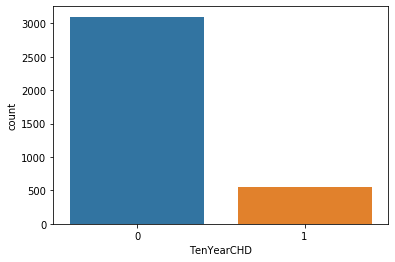

In [38]:
 #checking the number of positive heart disease patients
sns.countplot(x="TenYearCHD", data = data)

In [42]:
# plt.figure(figsize=(15,12))
# sns.heatmap(data.corr(), annot = True)
# plt.show()

In [51]:
print(data.shape)

(3658, 16)


In [52]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [66]:
X = data.iloc[:, 0:15]
y = data.iloc[:,16]

In [72]:
# upsample minority for Having_Claim:
Having_HeartFail = data[data.TenYearCHD==1] # Minority Class
No_HeartFail = data[data.TenYearCHD==0] # Majority Class
ResampleFailRate = resample(Having_HeartFail,replace=True, # sample with replacement
                              n_samples=len(No_HeartFail), # match number in majority class
                              random_state=42) # reproducible results

# combine majority and upsampled minority
UpsampledHeartFail = pd.concat([No_HeartFail,ResampleFailRate])
UpsampledHeartFail.reset_index(drop=True,inplace=True)
print(UpsampledHeartFail.TenYearCHD.value_counts().sort_values(ascending=False))


0    3101
1    3101
Name: TenYearCHD, dtype: int64


In [67]:
print(X)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [68]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3658, dtype: int64
